# Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()
# Target: IS_SUCCESSFUL
# Features: APPLICATION_TYPE, AFFILIATION, CLASSIFICATION,
#           USE_CASE, ORGANIZATION, STATUS, INCOME_AMT,
#           SPECIAL_CONSIDERATIONS, ASK_AMT

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

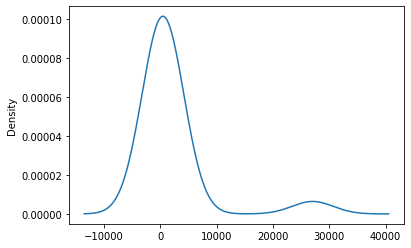

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than 500
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")
    
# Check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C8210        1
C1283        1
C1248        1
C1820        1
C2600        1
Name: CLASSIFICATION, Length: 71, dtype: int64

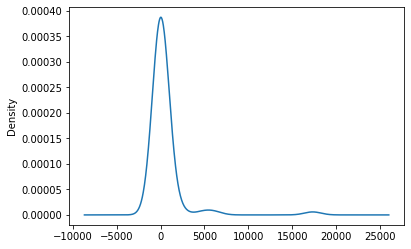

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than 1800?
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")
    
# Check to make sure binning was successful
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = list(application_df.dtypes[application_df.dtypes == "object"].index)
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M

In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Deliverable 2: Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
# number of layer1 neurons = 2*(number of inputs=43) = 86 ~ 80
hidden_nodes_layer1 = 80
# number of layer2 neurons: Between (input=80) and (output=1 - classifier)
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  # binary clasifier -> 1 output neuron/sigmoid activation

# Check the structure of the model
nn.summary()
# 1st Hidden Layer: 3520 params = [43 inputs (from input layer) * 80 neurons] + (80 bias terms)
# 2nd Hidden Layer: 2430 params = [80 inputs (from 1st hidden layer) * 30 neurons] + (30 bias terms)
# Output Layer: 31 params = [30 inputs (from 2nd hidden layer) * 1 neuron] + (1 bias term)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Add model weight checkpoints during training
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path="checkpoints/weights.{epoch}.hdf5"

# Create callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 655us/step - loss: 0.5902 - accuracy: 0.7017
Epoch 2/100
804/804 [==============================] - 1s 638us/step - loss: 0.5595 - accuracy: 0.7239
Epoch 3/100
804/804 [==============================] - 1s 641us/step - loss: 0.5503 - accuracy: 0.7295
Epoch 4/100
804/804 [==============================] - 1s 629us/step - loss: 0.5507 - accuracy: 0.7305
Epoch 5/100
804/804 [==============================] - 1s 623us/step - loss: 0.5472 - accuracy: 0.7328

Epoch 00005: saving model to checkpoints/weights.5.hdf5
Epoch 6/100
804/804 [==============================] - 1s 653us/step - loss: 0.5457 - accuracy: 0.7319
Epoch 7/100
804/804 [==============================] - 1s 644us/step - loss: 0.5527 - accuracy: 0.7286
Epoch 8/100
804/804 [==============================] - 1s 632us/step - loss: 0.5416 - accuracy: 0.7374
Epoch 9/100
804/804 [==============================] - 1s 640us/step - loss: 0.5489 - accuracy: 0.7290
Epoch 10/100
804

804/804 [==============================] - 0s 618us/step - loss: 0.5384 - accuracy: 0.7390
Epoch 73/100
804/804 [==============================] - 0s 616us/step - loss: 0.5349 - accuracy: 0.7393
Epoch 74/100
804/804 [==============================] - 0s 616us/step - loss: 0.5371 - accuracy: 0.7391
Epoch 75/100
804/804 [==============================] - 0s 617us/step - loss: 0.5363 - accuracy: 0.7351

Epoch 00075: saving model to checkpoints/weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 1s 625us/step - loss: 0.5342 - accuracy: 0.7374
Epoch 77/100
804/804 [==============================] - 0s 617us/step - loss: 0.5345 - accuracy: 0.7391
Epoch 78/100
804/804 [==============================] - 1s 672us/step - loss: 0.5327 - accuracy: 0.7416
Epoch 79/100
804/804 [==============================] - 0s 620us/step - loss: 0.5341 - accuracy: 0.7410
Epoch 80/100
804/804 [==============================] - 0s 620us/step - loss: 0.5302 - accuracy: 0.7417

Epoch 00080: savin

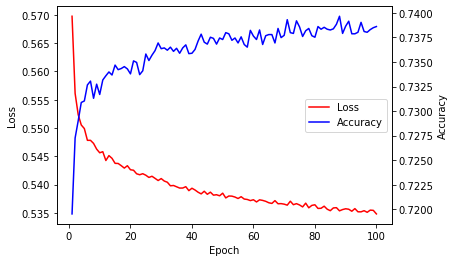

In [20]:
# Visualize Loss/Accuracy
import matplotlib.pyplot as plt
history_df = pd.DataFrame(fit_model.history,
                          index=range(1, len(fit_model.history["loss"]) + 1))

fig, ax = plt.subplots()
loss = ax.plot(history_df["loss"], color="red", label="Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax2 = ax.twinx()
acc = ax2.plot(history_df["accuracy"], color="blue", label="Accuracy")
ax2.set_ylabel("Accuracy")

curves = loss + acc
labs = [l.get_label() for l in curves]
ax.legend(curves, labs, loc="center right")

plt.show()

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5601 - accuracy: 0.7326
Loss: 0.560060977935791, Accuracy: 0.7325947284698486


In [22]:
# Export and save model to HDF5 file
nn.save("trained_application.h5")

# Deliverable 3: Optimize the Model

## Exploratory Optimization

### Increasing Epochs from 100 to 200

In [23]:
# Increasing number of epochs
fit_model_inc_epochs = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 0s 620us/step - loss: 0.5351 - accuracy: 0.7382
Epoch 2/200
804/804 [==============================] - 1s 626us/step - loss: 0.5350 - accuracy: 0.7383
Epoch 3/200
804/804 [==============================] - 0s 616us/step - loss: 0.5351 - accuracy: 0.7386
Epoch 4/200
804/804 [==============================] - 0s 615us/step - loss: 0.5354 - accuracy: 0.7377
Epoch 5/200
804/804 [==============================] - 0s 615us/step - loss: 0.5348 - accuracy: 0.7387
Epoch 6/200
804/804 [==============================] - 0s 617us/step - loss: 0.5354 - accuracy: 0.7380
Epoch 7/200
804/804 [==============================] - 1s 623us/step - loss: 0.5346 - accuracy: 0.7391
Epoch 8/200
804/804 [==============================] - 0s 619us/step - loss: 0.5348 - accuracy: 0.7388
Epoch 9/200
804/804 [==============================] - 0s 618us/step - loss: 0.5349 - accuracy: 0.7389
Epoch 10/200
804/804 [==============================] - 1s 622us/step - l

804/804 [==============================] - 1s 939us/step - loss: 0.5331 - accuracy: 0.7396
Epoch 80/200
804/804 [==============================] - 1s 671us/step - loss: 0.5332 - accuracy: 0.7396
Epoch 81/200
804/804 [==============================] - 1s 659us/step - loss: 0.5336 - accuracy: 0.7396
Epoch 82/200
804/804 [==============================] - 1s 633us/step - loss: 0.5339 - accuracy: 0.7383
Epoch 83/200
804/804 [==============================] - 1s 624us/step - loss: 0.5333 - accuracy: 0.7385
Epoch 84/200
804/804 [==============================] - 0s 612us/step - loss: 0.5334 - accuracy: 0.7389
Epoch 85/200
804/804 [==============================] - 0s 605us/step - loss: 0.5337 - accuracy: 0.7386
Epoch 86/200
804/804 [==============================] - 0s 611us/step - loss: 0.5331 - accuracy: 0.7393
Epoch 87/200
804/804 [==============================] - 0s 610us/step - loss: 0.5331 - accuracy: 0.7401
Epoch 88/200
804/804 [==============================] - 1s 678us/step - loss:

804/804 [==============================] - 1s 634us/step - loss: 0.5328 - accuracy: 0.7395
Epoch 158/200
804/804 [==============================] - 0s 611us/step - loss: 0.5325 - accuracy: 0.7396
Epoch 159/200
804/804 [==============================] - 1s 646us/step - loss: 0.5321 - accuracy: 0.7397
Epoch 160/200
804/804 [==============================] - 1s 714us/step - loss: 0.5323 - accuracy: 0.7406
Epoch 161/200
804/804 [==============================] - 1s 929us/step - loss: 0.5318 - accuracy: 0.7397
Epoch 162/200
804/804 [==============================] - 1s 718us/step - loss: 0.5318 - accuracy: 0.7396
Epoch 163/200
804/804 [==============================] - 1s 705us/step - loss: 0.5320 - accuracy: 0.7395
Epoch 164/200
804/804 [==============================] - 1s 869us/step - loss: 0.5329 - accuracy: 0.7400
Epoch 165/200
804/804 [==============================] - 1s 964us/step - loss: 0.5322 - accuracy: 0.7393
Epoch 166/200
804/804 [==============================] - 1s 989us/ste

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5911 - accuracy: 0.7332
Loss: 0.5910987854003906, Accuracy: 0.7331778407096863


### Changing activation function from `relu` to `tanh`

In [25]:
# Changing Activation Function: try tanh to handle negative inputs in X_train_scaled
nn_tanh = tf.keras.models.Sequential()

# First hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn_tanh.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn_tanh.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  # binary clasifier -> 1 output neuron/sigmoid activation

# Check the structure of the model
nn_tanh.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3520      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn_tanh.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
fit_model_tanh = nn_tanh.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 650us/step - loss: 0.5864 - accuracy: 0.7078
Epoch 2/100
804/804 [==============================] - 1s 636us/step - loss: 0.5558 - accuracy: 0.7297
Epoch 3/100
804/804 [==============================] - 1s 656us/step - loss: 0.5571 - accuracy: 0.7265
Epoch 4/100
804/804 [==============================] - 1s 641us/step - loss: 0.5572 - accuracy: 0.7291
Epoch 5/100
804/804 [==============================] - 1s 636us/step - loss: 0.5514 - accuracy: 0.7275
Epoch 6/100
804/804 [==============================] - 1s 637us/step - loss: 0.5477 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 1s 629us/step - loss: 0.5504 - accuracy: 0.7305
Epoch 8/100
804/804 [==============================] - 1s 634us/step - loss: 0.5446 - accuracy: 0.7342
Epoch 9/100
804/804 [==============================] - 1s 624us/step - loss: 0.5444 - accuracy: 0.7352
Epoch 10/100
804/804 [==============================] - 1s 655us/step - l

804/804 [==============================] - 1s 627us/step - loss: 0.5353 - accuracy: 0.7362
Epoch 80/100
804/804 [==============================] - 1s 622us/step - loss: 0.5349 - accuracy: 0.7343
Epoch 81/100
804/804 [==============================] - 0s 621us/step - loss: 0.5332 - accuracy: 0.7376
Epoch 82/100
804/804 [==============================] - 0s 621us/step - loss: 0.5310 - accuracy: 0.7414
Epoch 83/100
804/804 [==============================] - 0s 620us/step - loss: 0.5336 - accuracy: 0.7415
Epoch 84/100
804/804 [==============================] - 1s 623us/step - loss: 0.5357 - accuracy: 0.7388
Epoch 85/100
804/804 [==============================] - 0s 621us/step - loss: 0.5335 - accuracy: 0.7373
Epoch 86/100
804/804 [==============================] - 0s 620us/step - loss: 0.5304 - accuracy: 0.7428
Epoch 87/100
804/804 [==============================] - 1s 623us/step - loss: 0.5308 - accuracy: 0.7430
Epoch 88/100
804/804 [==============================] - 1s 628us/step - loss:

In [28]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_tanh.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5569 - accuracy: 0.7341
Loss: 0.5568726062774658, Accuracy: 0.7341107726097107


### Reducing Number of Input Features with additional binning and removing redundant columns

In [29]:
# Reducing Number of Input Features
# "SPECIAL_CONSIDERATIONS_N" and "SPECIAL_CONSIDERATIONS_Y" are dedundant, drop "SPECIAL_CONSIDERATIONS_N"
# Bin categorical columns with more than 5 unique values
# Re-read data
application_df = pd.read_csv("Resources/charity_data.csv")

In [30]:
# Drop non-essential columns
application_df = application_df.drop(labels=["EIN", "NAME"], axis=1)

# Bin "APPLICATION_TYPE"
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df["APPLICATION_TYPE"].replace(app, "Other")

# Bin "CLASSIFICATION"
replace_class = list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df["CLASSIFICATION"] = application_df["CLASSIFICATION"].replace(cls, "Other")

In [31]:
# Look at INCOME_AMT value counts for binning
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [32]:
# Determine which values to replace if counts are less than 3000
replace_income = list(income_counts[income_counts < 3000].index)

# Replace in dataframe
for income in replace_income:
    application_df["INCOME_AMT"] = application_df["INCOME_AMT"].replace(income, "Other")
    
# Check to make sure binning was successful
application_df["INCOME_AMT"].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
Other             2790
Name: INCOME_AMT, dtype: int64

In [33]:
# Look at AFFILIATION value counts for binning
aff_counts = application_df["AFFILIATION"].value_counts()
aff_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [34]:
# Determine which values to replace if counts are less than 15000
replace_aff = list(aff_counts[aff_counts < 15000].index)

# Replace in dataframe
for aff in replace_aff:
    application_df["AFFILIATION"] = application_df["AFFILIATION"].replace(aff, "Other")
    
# Check to make sure binning was successful
application_df["AFFILIATION"].value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [35]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(labels=application_cat, axis=1)
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Independent',
       'AFFILIATION_Other', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_25000-99999',
       'INCOME_AMT_Other', 'SPECIAL_CONSIDERATIONS_N',
       'SPECIAL_CONSIDERATIONS_Y'],
      dtype='object')

In [37]:
# Drop "SPECIAL_CONSIDERATION_N":
application_df = application_df.drop("SPECIAL_CONSIDERATIONS_N", axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_100000-499999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [38]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values.reshape(-1, 1)
X = application_df.drop("IS_SUCCESSFUL", axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_reduced_input = tf.keras.models.Sequential()

# First hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_reduced_input.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_reduced_input.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_reduced_input.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                2800      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 5,261
Trainable params: 5,261
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn_reduced_input.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model_reduced_input = nn_reduced_input.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 638us/step - loss: 0.5892 - accuracy: 0.7028
Epoch 2/100
804/804 [==============================] - 1s 633us/step - loss: 0.5566 - accuracy: 0.7296
Epoch 3/100
804/804 [==============================] - 1s 625us/step - loss: 0.5567 - accuracy: 0.7292
Epoch 4/100
804/804 [==============================] - 0s 620us/step - loss: 0.5532 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 0s 620us/step - loss: 0.5533 - accuracy: 0.7312
Epoch 6/100
804/804 [==============================] - 0s 621us/step - loss: 0.5521 - accuracy: 0.7297
Epoch 7/100
804/804 [==============================] - 1s 624us/step - loss: 0.5550 - accuracy: 0.7272
Epoch 8/100
804/804 [==============================] - 1s 627us/step - loss: 0.5502 - accuracy: 0.7279
Epoch 9/100
804/804 [==============================] - 1s 634us/step - loss: 0.5488 - accuracy: 0.7369
Epoch 10/100
804/804 [==============================] - 1s 635us/step - l

804/804 [==============================] - 1s 634us/step - loss: 0.5395 - accuracy: 0.7377
Epoch 80/100
804/804 [==============================] - 1s 624us/step - loss: 0.5408 - accuracy: 0.7366
Epoch 81/100
804/804 [==============================] - 1s 650us/step - loss: 0.5381 - accuracy: 0.7422
Epoch 82/100
804/804 [==============================] - 1s 632us/step - loss: 0.5360 - accuracy: 0.7393
Epoch 83/100
804/804 [==============================] - 1s 635us/step - loss: 0.5389 - accuracy: 0.7384
Epoch 84/100
804/804 [==============================] - 1s 623us/step - loss: 0.5356 - accuracy: 0.7402
Epoch 85/100
804/804 [==============================] - 1s 636us/step - loss: 0.5338 - accuracy: 0.7414
Epoch 86/100
804/804 [==============================] - 1s 632us/step - loss: 0.5392 - accuracy: 0.7357
Epoch 87/100
804/804 [==============================] - 1s 629us/step - loss: 0.5366 - accuracy: 0.7408
Epoch 88/100
804/804 [==============================] - 1s 634us/step - loss:

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_reduced_input.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5751 - accuracy: 0.7265
Loss: 0.5750834941864014, Accuracy: 0.7265306115150452
